In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import clear_output
import time
plt.rcParams.update({'font.size': 14})

from utilities import error, prepare_phi_and_S, convert1D_to_2D, plot_phi,residual

In [6]:
def GS(Nx, Ny, phi, omega,S,aE,aW,aN,aS,a0, start, Rlogger):
    tol = 1e-6
    
    for _ in tqdm(range(10000)):

        for i in range(1,Nx-1):
            for j in range(1,Ny-1):

                # Gauss-Siedel Update
                phi[i,j] = omega*(S[i,j] - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1]) / a0 + (1-omega)*phi[i,j]

        # Calculate residual
        R2 = 0
        R = np.zeros((Nx,Ny))

        for i in range(1,Nx-1):    
            for j in range(1,Ny-1):
                R[i,j] = S[i,j] - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1] - a0*phi[i,j]
                R2 = R2+R[i,j]**2

        R2 = np.sqrt(R2)
        Rlogger.append(R2)
        if _ %500==0:
            clear_output(True)
            print('Residual:', R2)
            
        if R2<tol:
            print('omega: ',omega, 'Converged! Residual: ',R2, 'Time elapsed: ', time.time()-start)
            break
            
    return Rlogger

In [21]:
# numbering scheme used is k = (j-1)*N + i

Nx = 81
Ny = 81
L = 1   # length
H = 1   # length

S = np.zeros((Nx,Ny))
phi = np.zeros((Nx,Ny))

dx = L/(Nx-1)    # Grid size
dy = H/(Ny-1)    # Grid size

tol = 1e-6
aE = 1/dx**2
aW = 1/dx**2
aN = 1/dy**2
aS = 1/dy**2
a0 = -(2/dx**2 + 2/dy**2)

phi, S = prepare_phi_and_S(Nx, Ny, phi, L, H)


Rlogger_1 = []
Rlogger_2 = []
Rlogger_3 = []

omega = 0.5
start = time.time()
S = np.zeros((Nx,Ny))
phi = np.zeros((Nx,Ny))
phi, S = prepare_phi_and_S(Nx, Ny, phi, L, H)

Rlogger_1 = GS(Nx, Ny, phi, omega,S,aE,aW,aN,aS,a0, start, Rlogger_1)

omega = 1
start = time.time()
S = np.zeros((Nx,Ny))
phi = np.zeros((Nx,Ny))
phi, S = prepare_phi_and_S(Nx, Ny, phi, L, H)

Rlogger_2 = GS(Nx, Ny, phi, omega,S,aE,aW,aN,aS,a0, start, Rlogger_2)

omega = 1.5
start = time.time()
S = np.zeros((Nx,Ny))
phi = np.zeros((Nx,Ny))
phi, S = prepare_phi_and_S(Nx, Ny, phi, L, H)

Rlogger_3 = GS(Nx, Ny, phi, omega,S,aE,aW,aN,aS,a0, start, Rlogger_3)


 45%|████▌     | 4508/10000 [02:02<02:30, 36.39it/s]

Residual: 2.6041587037423433e-06


 47%|████▋     | 4707/10000 [02:08<02:24, 36.67it/s]

omega:  1.5 Converged! Residual:  9.962479562511137e-07 Time elapsed:  128.42228293418884


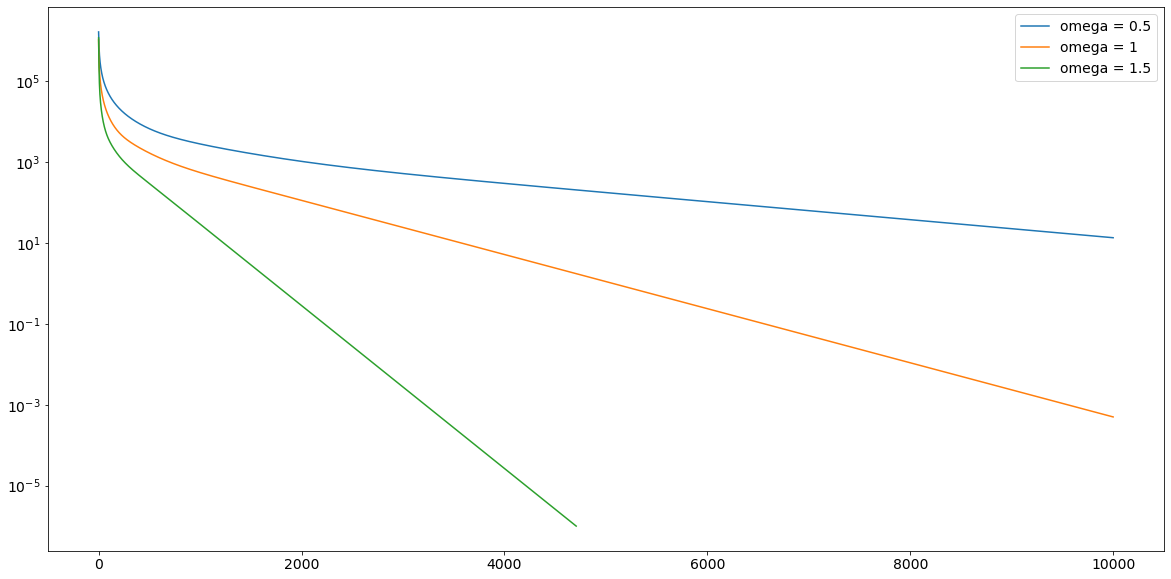

In [23]:
plt.figure(figsize=(20,10))
plt.plot(Rlogger_1, label = 'omega = 0.5')
plt.plot(Rlogger_2, label = 'omega = 1')
plt.plot(Rlogger_3, label = 'omega = 1.5')
plt.yscale('log')
plt.legend()